In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Functions

def OLS(Y, Y_hat):
    return np.trace((Y - Y_hat).T.dot(Y - Y_hat))

def R2(Y, Y_hat):
    return 1 - ((Y - Y_hat)**2).sum(axis = 0) / ((Y - Y_hat.mean(axis = 0))**2).sum(axis = 0)


# Determine the Dimensions

N = 500
D = 3
K = 2


# Simulate the Data

X = np.random.randn(N,D)
PHI = np.column_stack((np.array([[1]*N]).T, X, X[:,0]**2, X[:,1]**2, X[:,2]**2))

W_true = np.random.randn(PHI.shape[1], K)

Y = PHI.dot(W_true) + np.random.randn(N,K)


# Fit the Model (Normal Equation Solution)

W = np.linalg.solve(PHI.T.dot(PHI), PHI.T.dot(Y))
Y_hat = PHI.dot(W)


# Report R-squared

print("y_1 R-squared: {}".format(R2(Y, Y_hat)[0]))
print("y_2 R-squared: {}".format(R2(Y, Y_hat)[1]))

y_1 R-squared: 0.9380761032473278
y_2 R-squared: 0.9152556310480204


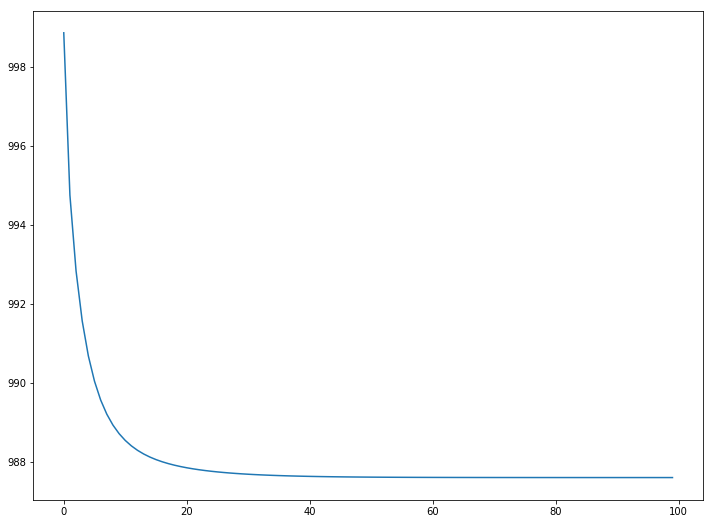

In [70]:
def OLS(Y, Y_hat):
    return np.trace((Y - Y_hat).T.dot(Y - Y_hat))

def R2(Y, Y_hat):
    return 1 - ((Y - Y_hat)**2).sum(axis = 0) / ((Y - Y_hat.mean(axis = 0))**2).sum(axis = 0)


# Determine the Dimensions

N = 500
D = 3
K = 2


# Simulate the Data

X = np.random.randn(N,D)
PHI = np.column_stack((np.array([[1]*N]).T, X, X[:,0]**2, X[:,1]**2, X[:,2]**2))

W_true = np.random.randn(PHI.shape[1],2)

Y = PHI.dot(W_true) + np.random.randn(N,K)

# J is of OLS
J=[]

eta = 3e-4
epochs = 100

for i in range ( epochs):
    Y_hat = PHI.dot(W_true)
    J.append(OLS(Y,Y_hat))
    W_true -= eta*PHI.T.dot(Y_hat - Y)

plt.figure(figsize= (12,9))

plt.plot(J)

print("y_1 R-squared: {}".format(R2(Y, Y_hat)[0])) 
print("y_2 R-squared: {}".format(R2(Y, Y_hat)[1]))